In [38]:
def graficoventos(equipo,evento,id_partido):
    
    import pandas as pd
    import matplotlib.pyplot as plt
    from matplotlib.patches import Arc
    import numpy as np
   
    pd.options.mode.chained_assignment=None

    dfeventos=pd.read_json('https://raw.githubusercontent.com/gonzalo09002/open-data/81bb27062e43874a1bdb72be9d243e93a8212dbc/data/events/{}.json'.format(id_partido))    
   
    matches=pd.read_json('https://raw.githubusercontent.com/gonzalo09002/open-data/81bb27062e43874a1bdb72be9d243e93a8212dbc/data/matches/37/42.json')
    matches['union']=range(len(matches))
    
    #Separamos los datos de la columna home_team y le añadimos la columna union
    local1=matches['home_team'].apply(pd.Series)
    local1['union']=range(len(matches))

    #Unimos los dataframes 
    local2=pd.merge(matches, local1,how='outer',on='union')

    #Nos quedamos con la fila correspondiente al partido y seleccionamos el nombre del equipo local para guardarlo en su variable
    fila1=local2.loc[local2['match_id']==id_partido]
    local=fila1.iloc[0,-5]

    #Mismo proceso para equipo visitante
    visit1=matches['away_team'].apply(pd.Series)
    visit1['union']=range(len(matches))
    visit2=pd.merge(matches, visit1,how='outer',on='union')
    fila2=visit2.loc[visit2['match_id']==id_partido]
    visitante=fila2.iloc[0,-5]

    goleslocal=fila1.iloc[0,7]
    golesvisitante=fila1.iloc[0,8]
    
    #Jornada
    jornada=fila1.iloc[0,12]
    fecha=fila1.iloc[0,1]
    
    #nos quedamos con los eventos de recuperaciones de balón en juego corrido
    dfeventos['tipo'] = dfeventos['type'].apply(lambda x: x.get('name'))
    dfrec=dfeventos.loc[dfeventos['tipo']==evento]

    #separamos la columna team
    sep=dfrec['team'].apply(pd.Series)
    sep1=list(sep)
    dfrec[sep1]=pd.DataFrame(dfrec.team.values.tolist(),index=dfrec.index)
    #nos quedamos con las recuperaciones propias
    dfrec=dfrec[(dfrec['name']==equipo)]
    #separamos la columna location
    sep=dfrec['location'].apply(pd.Series)
    sep1=list(sep)
    dfrec[sep1]=pd.DataFrame(dfrec.location.values.tolist(),index=dfrec.index)

    dfrec.rename(columns={0: 'x', 1: 'y'},inplace=True)
    
    dfrec['y']=80-(dfrec['y'])
    
    numeventos=len(dfrec)


    fig, ax = plt.subplots(figsize=(18,14))

    #Dibujamos el campo siguiendo coordenadas de StatsBomb
    plt.plot([0,0],[0,80], color="black")
    plt.plot([0,120],[80,80], color="black") 
    plt.plot([120,120],[80,0], color="black")
    plt.plot([120,0],[0,0], color="black")
    plt.plot([60,60],[80,0], color="black")

    plt.plot([0,18],[62,62],color="black")
    plt.plot([0,18],[18,18],color="black")
    plt.plot([18,18],[18,62],color="black")

    plt.plot([120,102],[62,62],color="black")
    plt.plot([120,102],[18,18],color="black")
    plt.plot([102,102],[18,62],color="black")

    plt.plot([0,6],[50,50],color="black")
    plt.plot([0,6],[30,30],color="black")
    plt.plot([6,6],[50,30],color="black")
 
    plt.plot([120,114],[30,30],color="black")
    plt.plot([120,114],[50,50],color="black")
    plt.plot([114,114],[30,50],color="black")

    centreCircle = plt.Circle((60,40),9.15,color="black",fill=False)
    centreSpot = plt.Circle((60,40),0.6,color="black")
    leftPenSpot = plt.Circle((12,40),0.6,color="black")
    rightPenSpot = plt.Circle((108,40),0.6,color="black")

    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)

    leftArc = Arc((12,40),height=18.3,width=18.3,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((108,40),height=18.3,width=18.3,angle=0,theta1=130,theta2=230,color="black")

    ax.add_patch(leftArc)
    ax.add_patch(rightArc)


    ax.scatter(x=dfrec['x'],y=dfrec['y'],s=200,marker='2',c='#C0AC05')
    ax.axis("off")

    ax_histx=fig.add_axes([0.125,0.9,0.765,0.1],label='nuevos')
    ax_histx.xaxis.set_visible(False) 
    ax_histx.set_frame_on(False)



    ax_histy = fig.add_axes([0.9,0.125,0.1,0.75],label='nuevosy')
    ax_histy.yaxis.set_visible(False)
    ax_histy.set_frame_on(False)


    binsx = np.arange(0, 120, 0.8)
    binsy= np.arange(0,80,0.8)
    ax_histx.hist(dfrec['x'],bins=binsx, color='#C0AC05' )

    ax_histy.hist(dfrec['y'], bins=binsy,orientation='horizontal',color='#C0AC05')


    ax.text(60, 110, s ="Campograma: {} - {}".format(evento,equipo), size = 35, color='black', ha='center', family='bahnschrift')
    ax.text(110, 103, s ="#{}: {}".format(evento,numeventos), size = 20, color='black', ha='center', family='bahnschrift')
    ax.text(0, 103, s ="{}: {}\n{}: {}".format(local,goleslocal,visitante,golesvisitante), size = 20, color='black', ha='left', family='bahnschrift')
    ax.text(60, 117, s = "Jornada {} \n {}".format(jornada,fecha), rotation = 0, size = 15, bbox=dict(facecolor='#D0D0D0', alpha=0.8), ha='center', family='bahnschrift')

    
    plt.show()

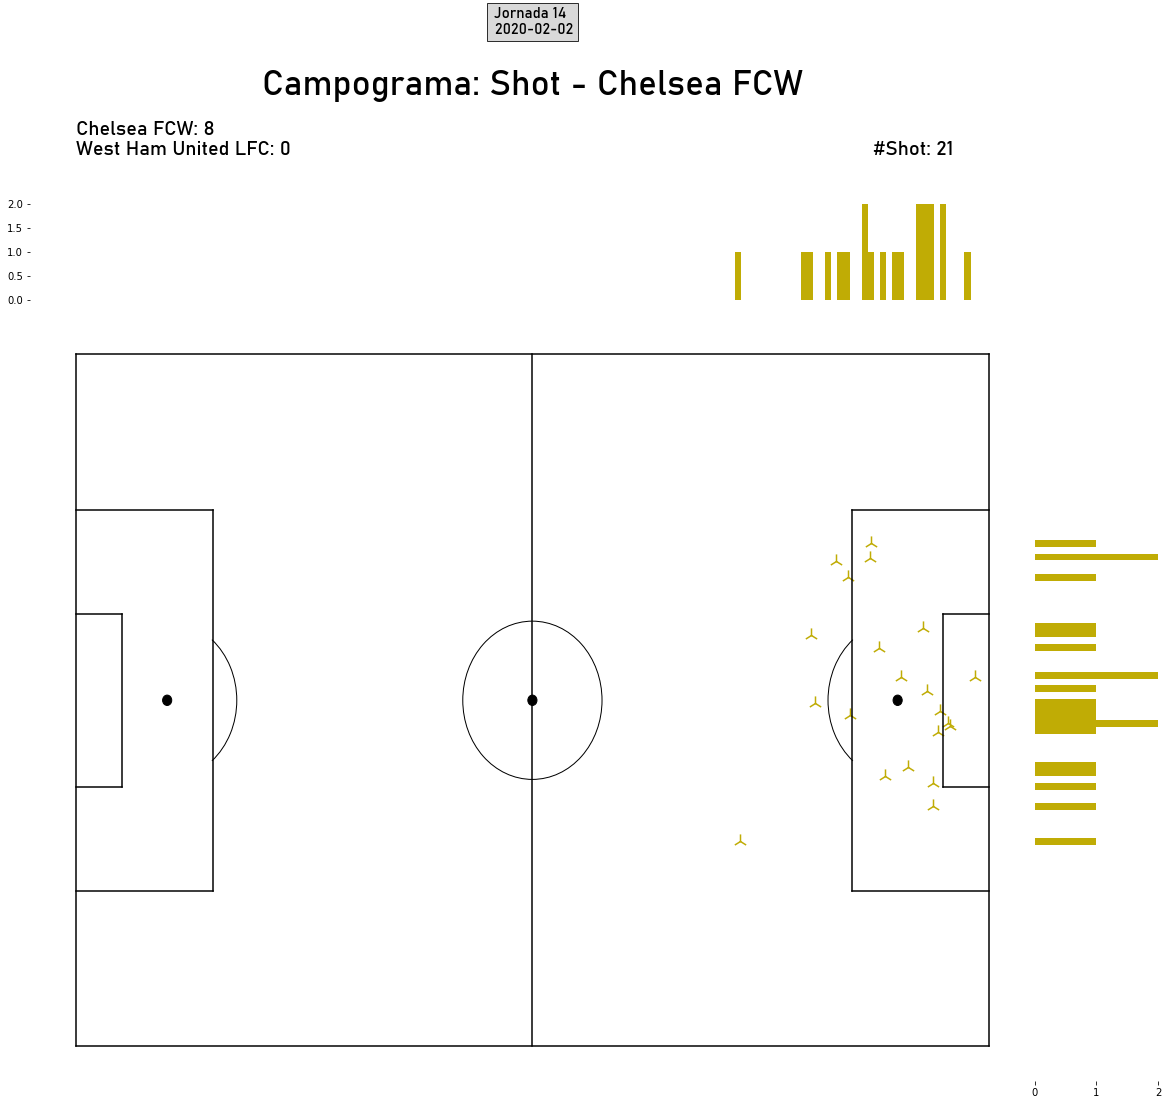

In [39]:
graficoeventos("Chelsea FCW","Shot",2275057)